<a href="https://colab.research.google.com/github/Hammamelsh/Data-engineeringwork/blob/main/cleaning%20and%20visualising%20data%20using%20python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

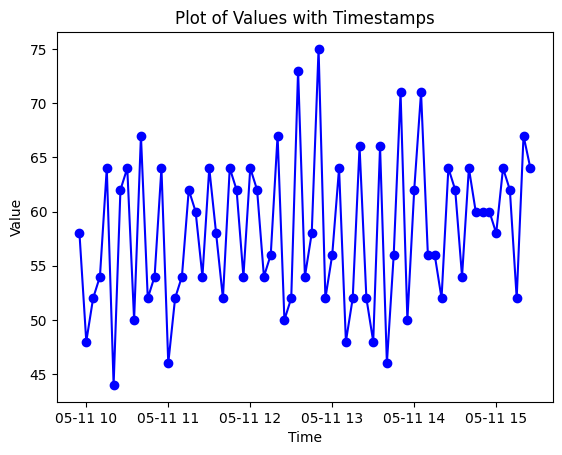

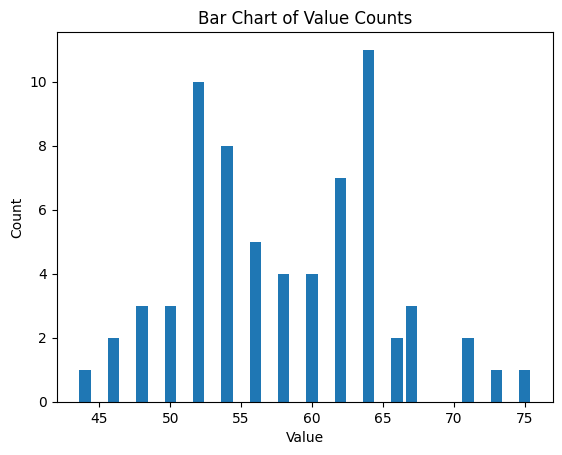

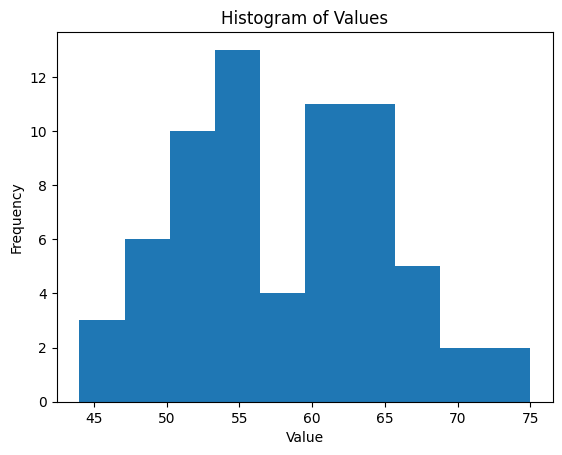

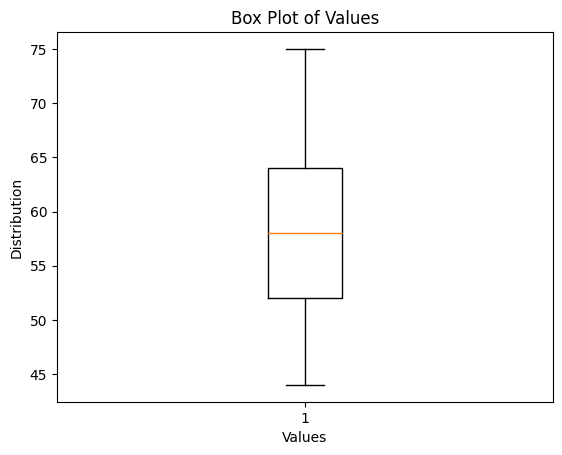

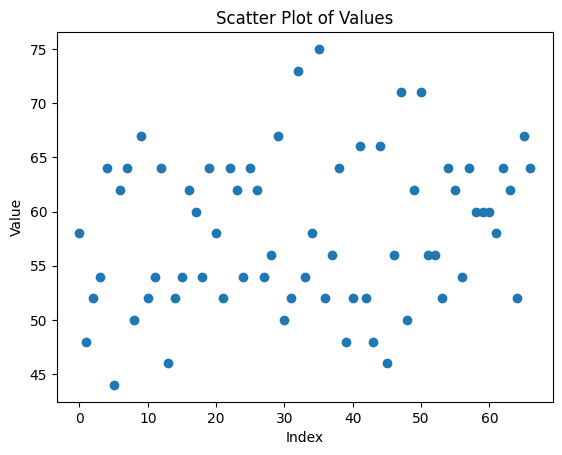

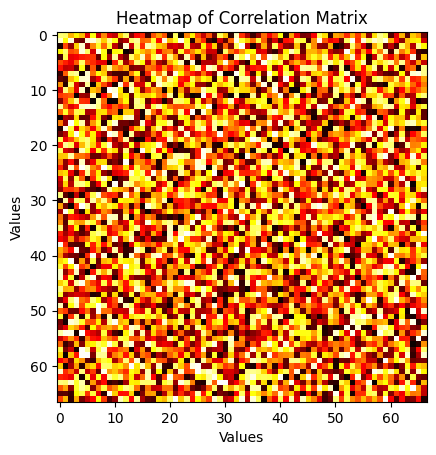

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timedelta

def decode_ascii(ascii_list):
    decoded_string = ''.join(chr(i) for i in ascii_list)
    return decoded_string

logged_data_block_00 = [91, 123, 34, 49, 34, 58, 49, 44, 34, 50, 34, 58, 50, 44, 34, 51, 34, 58, 49, 54, 56, 51, 55, 57, 56, 57, 48, 48, 44, 34, 52, 34, 58, 51, 48, 48, 44, 34, 53, 34, 58, 91, 53, 56, 44, 52, 56, 44, 53, 50, 44, 53, 52, 44, 54, 52, 44, 52, 52, 44, 54, 50, 44, 54, 52, 44, 53, 48, 44, 54, 55, 44, 53, 50, 44, 53, 52, 44, 54, 52, 44, 52, 54, 44, 53, 50, 44, 53, 52, 44, 54, 50, 44, 54, 48, 44, 53, 52, 44, 54, 52, 44, 53, 56, 44, 53, 50, 44, 54, 52, 44, 54, 50, 44, 53, 52, 44, 54, 52, 44, 54, 50, 44, 53, 52, 44, 53, 54, 44, 54, 55, 44, 53, 48, 44, 53, 50, 44, 55, 51, 44, 53, 52, 44, 53, 56, 44, 55, 53, 44, 53, 50, 44, 53, 54, 44, 54, 52, 44, 52, 56, 44, 53, 50, 44, 54, 54, 44, 53, 50, 44, 52, 56, 44, 54, 54, 44, 52, 54, 44, 53, 54, 44, 55, 49, 44, 53, 48, 44, 54, 50, 44, 55, 49, 44, 53, 54, 44, 53, 54, 44, 53, 50, 44, 54, 52, 44, 54, 50, 44, 53, 52, 44, 54, 52, 44, 54, 48, 44, 54, 48, 44, 54, 48, 44, 53, 56, 44, 54, 52, 44, 54, 50, 44, 53, 50, 44, 54, 55, 44, 54, 52, 93, 125, 93]

decoded_data = decode_ascii(logged_data_block_00)

# Fix JSON formatting
fixed_json_data = decoded_data.replace('-timestamp', '')
fixed_json_data = fixed_json_data.replace('-Data', ', "2"')
fixed_json_data = fixed_json_data.replace('":"', '": ')
fixed_json_data = fixed_json_data.replace('":', '": ')
fixed_json_data = fixed_json_data.replace('},{', '}, {')

# Load fixed JSON data
json_data = json.loads(fixed_json_data)

# Extract time and data values
timestamps = []
data_values = []
sampling_time = None

for item in json_data:
    if "3" in item:
        timestamp = item["3"]
        timestamps.append(timestamp)
    if "4" in item:
        sampling_time = item["4"]
    if "5" in item:
        values = item["5"]
        data_values.extend(values)

# Calculate time points based on the first timestamp and sampling time
time_points = [datetime.fromtimestamp(timestamp) + timedelta(seconds=sampling_time * i) for i in range(len(data_values))]

# Plot the values with timestamps
plt.plot(time_points, data_values, marker='o', linestyle='-', color='blue')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Plot of Values with Timestamps')

plt.show()

# Additional Visualizations

# Bar Chart

# Count the occurrences of each value
value_counts = {value: data_values.count(value) for value in set(data_values)}

# Extract unique values and their corresponding counts
values = list(value_counts.keys())
counts = list(value_counts.values())

# Plot the bar chart
plt.bar(values, counts)

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Bar Chart of Value Counts')

plt.show()

# Histogram

# Plot the histogram
plt.hist(data_values, bins=10)

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

plt.show()

# Box Plot

# Plot the box plot
plt.boxplot(data_values)

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Distribution')
plt.title('Box Plot of Values')

plt.show()

# Scatter Plot

# Generate random x-values for demonstration
x_values = [i for i in range(len(data_values))]

# Plot the scatter plot
plt.scatter(x_values, data_values)

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Values')

plt.show()

# Heatmap

# Generate a random correlation matrix for demonstration
correlation_matrix = np.random.rand(len(data_values), len(data_values))

# Plot the heatmap
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Values')
plt.title('Heatmap of Correlation Matrix')

plt.show()
